## 动态数组（ArrayList）

### 抽象数据结构（DTA）
数据抽象画步骤：
1. 确定要操作的数据元素
2. 确定对数据元素进行的操作
3. 对操作定义良好的接口
4. 完成对象

### 抽象数据结构：列表的操作

1. 创建一个空列表
2. 确定此列表是否为空
3. 确定列表中项目个数
4. 在列表中给定位置添加项目 
5. 在列表中给定位置删除元素 
6. 删除列表中所有元素
7. 获取列表中给定位置的项目 
8. 其他操作?

| 操作 | 对应时间复杂度 |
|------|-------------|
| append | o(1) |
| insert | o(n) |
| pop | o(1) |
| delete | o(n) |
| in/find | o(n) |

>注意：
>1. 当存储空间满了之后，需要重新分配存储空间，这时append操作的复杂度为o(n)，但是基于平均时间复杂度，append操作复杂度为o(1)。
>2. 注意append和delete操作元素的顺序（不要覆盖元素信息）。

### 动态数组和静态数组的区别
数组：
1. 存储在连续的存储空间
2. 存储长度固定
3. 索引从0开始
4. 边界检查

相同点：
>1. 在内存中开辟的空间是连续的，并且顺序存储数据。
>2. 任意顺序访问，可变大小的列表或字典数据结构允许增加删除元素。

不同点：
> 动态数组的存储空间可以改变

## Python中的Array vs. List

### Array Module -  Sequence of fixed-type data

The array module defines a sequence data structure that looks very much like a list except that all of the members have to be of the same type. The types supported are all numeric or other fixed-size primitive types such as bytes.

A computer system will have a huge number of bytes of memory, and to keep track of what information is stored in what byte, the computer uses an abstraction known as a memory address. In effect, each byte of memory is associated with a unique number that serves as its address (more formally, the binary representation of the number serves as the address). In this way, the computer system can refer to the data in “byte #2150” versus the data in “byte #2157,” for example. Memory addresses are typically coordinated with the physical layout of the memory system, and so we often portray the numbers in sequential fashion.

<img src="../images/ch02/memory.jpg" width="500"/> 

Array, a group of related variables can be stored one after another in a <B><I>contiguous</I></B> portion of the computer’s memory. 
<img src="../images/ch02/memorystr.jpg" width="500"/>

We describe this as an array of six characters, even though it requires 12 bytes of memory. We will refer to each location within an array as a cell, and will use an integer index to describe its location within the array, with cells numbered starting with 0, 1, 2, and so on.

Each cell of an array must use the same number of bytes. This requirement is what allows an arbitrary cell of the array to be accessed in <B><I>constant time</I></B> based on its index.

The appropriate memory address can be computed using the calculation, start + cellsize index

For example, cell 4 begins at memory location 2146 + 2 · 4 = 2146 + 8 = 2154

<img src="../images/ch02/arraysimple.jpg" width="160"/>

In below example, the array is configured to hold a sequence of bytes and is initialized with a simple string.

In [6]:
import array

s = 'sample' 
a = array.array('u', s)

print('As string:', s)
print('As array :', a)

As string: sample
As array : array('u', 'sample')


In [7]:
? array.array

In [8]:
len(a)

6

In [9]:
# 数组中每个元素占4个字节
a.itemsize

4

How about string? We want to store a list of people in array, however, people's names have different length. 

Python represents a list or tuple instance using an internal storage mechanism of an array of object references. At the lowest level, what is stored is a consecutive sequence of memory addresses at which the elements of the sequence reside. A high-level diagram of such a list is shown below:

<img src="../images/ch02/memorystrings.JPG" width="420"/>

Although the relative size of the individual elements may vary, the number of bits used to store the memory address of each element is fixed (e.g., 64-bits per address). In this way, Python can support constant-time access to a list or tuple element based on its index.

注意：
> A single list instance may include multiple references to the same object as elements of the list, and it is possible for a single object to be an element of two or more lists, as those lists simply store references back to that object. As an example, when you compute a slice of a list, the result is a new list instance, but that new list has references to the same elements that are in the original list.

<img src="../images/ch02/listslice.JPG" width="360"/>

In [11]:
# 数组切片会 make a copy
a = list(range(0, 9))
print(a)
b = a[3:7]
print(b)

b[0] = -1
print(a)
print(b)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[-1, 4, 5, 6]


In [13]:
import numpy as np

# 但是在 numpy 中不会
a = np.arange(10)
print(a)
b = a[3:7]
print(b)

b[0] = -1
print(a)
print(b)

b = a[3:7].copy()
print(b)
b[1] = -2
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[3 4 5 6]
[ 0  1  2 -1  4  5  6  7  8  9]
[-1  4  5  6]
[-1  4  5  6]
[ 0  1  2 -1  4  5  6  7  8  9]
[-1 -2  5  6]


### Shallow Copy vs. Deep Copy

<img src="../images/ch02/shallow1.JPG" width="300"/>
<img src="../images/ch02/shallow2.JPG" width="240"/>

In [14]:
a = [0] * 8
a[2] = 1
a

[0, 0, 1, 0, 0, 0, 0, 0]

In [15]:
a = [[0] * 8] * 8
a[0][0] = 9
a

[[9, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0]]

<img src="../images/ch02/shallow3.JPG" width="240"/>

The correct representation should be like this:
<img src="../images/ch02/shallow4.JPG" width="380"/>

To properly initialize a two-dimensional list, we must ensure that each cell of the primary list refers to an independent instance of a secondary list. This can be accomplished through the use of Python’s list comprehension syntax.

In [19]:
a = [[i]*8 for i in [0] * 8]
a[0][0] = 9
a

[[9, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [20]:
m, n = 3, 2
data = [ [0] * n for j in range(m) ]
data

[[0, 0], [0, 0], [0, 0]]

### Extend Array
An array can be extended and otherwise manipulated in the same ways as other Python sequences.

In [21]:
a = array.array('i', range(5))
print('Initial :', a)

a.extend(range(5))
print('Extended:', a)

print('Slice   :', a[3:6])

print('Iterator:', list(enumerate(a)))

print(type(a))
print(len(a))

Initial : array('i', [0, 1, 2, 3, 4])
Extended: array('i', [0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
Slice   : array('i', [3, 4, 0])
Iterator: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 0), (6, 1), (7, 2), (8, 3), (9, 4)]
<class 'array.array'>
10


In [22]:
a = array.array("B", range(16)) # unsigned char
b = array.array("h", range(-8,9)) # signed short

# repr:将对象转化为供解释器读取的形式。
print(a)
print(repr(a.tostring()))

print(b)
print(repr(b.tostring()))

array('B', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
b'\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x0c\r\x0e\x0f'
array('h', [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
b'\xf8\xff\xf9\xff\xfa\xff\xfb\xff\xfc\xff\xfd\xff\xfe\xff\xff\xff\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00'


### List

String is a sequence of characters, list is a sequece of object. Use list when the order of objects matters a lot.

- ADT List Operations
    - Create an empty list
    - Determine whether the list is empty
    - Determine the number of items in a list
    - Add an item at given position in a list
    - Remove the item at a given position in a list
    - Remove all the items from a list
    - Get the item at a given position in a list
    - Other operations?
    
<img src="../images/ch02/list.png" width="680"/>

<img src="../images/ch02/list2.png" width="300"/>

<img src="../images/ch02/list3.png" width="300"/>   

In [23]:
fruits = ['orange', 'apple', 'pear', 'banana', 'kiwi', 'apple', 'banana']
fruits.index('banana')

3

In [24]:
fruits.index('banana', 4)

6

In [27]:
fruits.reverse()
fruits

['orange', 'apple', 'pear', 'banana', 'kiwi', 'apple', 'banana']

In [29]:
fruits.append('grape')
fruits

['orange', 'apple', 'pear', 'banana', 'kiwi', 'apple', 'banana', 'grape']

In [30]:
fruits.sort()
fruits

['apple', 'apple', 'banana', 'banana', 'grape', 'kiwi', 'orange', 'pear']

In [31]:
squares = []
for x in range(10):
    squares.append(x**2)
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [32]:
squares = [x**2 for x in range(10)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [33]:
[(x, y) for x in [1,2,3] for y in [3,1,4] if x != y]

[(1, 3), (1, 4), (2, 3), (2, 1), (2, 4), (3, 1), (3, 4)]

In [34]:
vec = [-4, -2, 0, 2, 4]
[x*2 for x in vec]

[-8, -4, 0, 4, 8]

In [51]:
matrix = [
   [1, 2, 3, 4],
   [5, 6, 7, 8],
   [9, 10, 11, 12],
]
[[row[i] for row in matrix] for i in range(4)]

[[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]

In [54]:
# 二维矩阵reshape
def reshape(matrix):
    m = np.array(matrix)
    return [[row[i] for row in matrix] for i in range(m.shape[-1])]
reshape(matrix)

[[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]

## 设计自己的动态数组

In [85]:
import ctypes

class DynamicArray:
    def __init__(self):
        self._n = 0  # size
        self._capacity = 10
        self._A = self._make_array(self._capacity)
    
    def _make_array(self, c):
        return (c * ctypes.py_object)()
    
    # len(list)
    def __len__(self):
        return self._n
    
    def is_empty(self):
        return self._n == 0
    
    def __getitem__(self, k):
        return self._A[k]
    
    def append(self, v):
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        self._A[self._n] = v
        self._n += 1
    
    def _resize(self, c):
        B = self._make_array(c)
        for i in range(self._n):
            B[i] = self._A[i]
        self._A = B
        self._capacity = c
    
    def _print(self):
        for i in range(self._n):
            print(self._A[i], end=" ")
        print()
        
    # O(n)
    def insert(self, k, value):
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        for j in range(self._n, k, -1):
            self._A[j] = self._A[j-1]
        self._A[k] = value
        self._n += 1
    
    # O(n)
    def remove(self, value):
        for i in range(self._n):
            if self._A[i] == value:
                for j in range(i, self._n-1):
                    self._A[j] = self._A[j+1]
                self._A[self._n - 1] = None
                self._n -= 1
                return
        raise ValueError("value not found")
    
    # O(1)
    def pop(self):
        if self._n == 0:
            return
        self._A[self._n - 1] = None
        self._n -= 1

In [87]:
mylist = DynamicArray()
print ('size was: ', str(len(mylist)))
mylist.append(10)
mylist.append(20)
mylist.append(30)
mylist.insert(0, 0)
mylist.insert(1, 5)
mylist.insert(3, 15)
mylist._print()

mylist.remove(20)
mylist._print()

mylist.pop()
mylist._print()

print ('size is: ', str(len(mylist)))

size was:  0
0 5 10 15 20 30 
0 5 10 15 30 
0 5 10 15 
size is:  4


## 相关题目

### Ex1：挖雷游戏

我们来写一个小程序：

<img src="../images/ch02/mine.jpg" width="200"/> 

程序接收三个参数，M，N和p，然后生成一个M * N的矩阵，然后每一个cell有p的概率是地雷。生成矩阵后，再计算出每一个cell周围地雷的数量。

In [27]:
import random

def minesweeper(m, n, p):
    board = [[None]*(n+2) for i in range(m+2)]
    
#     for i in range(1, m + 1):
#         for j in range(1, n + 1):
#             r = random.random()
#             board[i][j] = -1 if r < p else 0

#     for i in range(1, m + 1):
#         for j in range(1, n + 1):
#             print("*", end=" ") if board[i][j] == -1 else print(".", end=" ")
#         print()
        
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            r = random.random()
            board[i][j] = -1 if r < p else 0
            print('*', end=" ") if board[i][j] == -1 else print('.', end=" ")
        print()
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if board[i][j] != -1:
                for ii in range(i - 1, i + 2):
                    for jj in range(j - 1, j + 2):
                        board[i][j] += 1 if board[ii][jj] == -1 else 0
    
    print()
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            print("*", end=" ") if board[i][j] == -1 else print(board[i][j], end=" ")
        print()

In [28]:
minesweeper(5, 10, 0.2)

. . . . * . . . . . 
. . . . * . . . . . 
* . * * * * . . . . 
. . . . . . . . . . 
. . * . . . . . . * 

0 0 0 2 * 2 0 0 0 0 
1 2 2 5 * 4 1 0 0 0 
* 2 * * * * 1 0 0 0 
1 3 3 4 3 2 1 0 1 1 
0 1 * 1 0 0 0 0 1 * 


### Ex2：矩阵0变换
给一个m×n的矩阵，如果有一个元素为0，则把该元素对应的行与列所有元素全部变成0。

In [32]:
def zero(matrix):
    m = [None] * len(matrix)
    n = [None] * len(matrix[0])
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == 0:
                m[i] = 1
                n[j] = 1
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if (m[i] == 1 or n[j] == 1):
                matrix[i][j] = 0

In [29]:
matrix = [  [ 1, 1, 1, 1, 1, 0, 1, 1, 1, 1 ],
            [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ],
            [ 1, 1, 0, 1, 1, 1, 1, 1, 1, 1 ],
            [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ],
            [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ] ]
for x in matrix:
    print(x, sep=" ")

[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [33]:
zero(matrix)
for x in matrix:
    print(x, sep=" ")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1]


### Ex3：九宫图
<img src="../images/ch02/magicsquare.jpg" width="100"/> 
考察点：熟练实现已知算法

In [45]:
def magic_square(n):
    magic = [[0] * n for i in range(n)]
    
    # 将最后一行的中间位置设置为1
    row = n-1
    col = n//2
    magic[row][col] = 1
    
    for i in range(2, n * n + 1):
        try_row = (row + 1) % n
        try_col = (col + 1) % n
        
        if (magic[try_row][try_col] == 0):
            row = try_row
            col = try_col
        else:
            row = (row - 1 + n) % n
            
        magic[row][col] = i
    
    for x in magic:
        print(x, sep=" ")

In [46]:
magic_square(3)

[4, 9, 2]
[3, 5, 7]
[8, 1, 6]


In [47]:
magic_square(5)

[11, 18, 25, 2, 9]
[10, 12, 19, 21, 3]
[4, 6, 13, 20, 22]
[23, 5, 7, 14, 16]
[17, 24, 1, 8, 15]


### Ex4：数独
<img src="../images/ch02/sudoku.jpg" width="200"/> 
给一个填好的数独，验证是否正确。

In [48]:
matrix = [
    [5,3,4,6,7,8,9,1,2],
    [6,7,2,1,9,5,3,4,8],
    [1,9,8,3,4,2,5,6,7],
    [8,5,9,7,6,1,4,2,3],
    [4,2,6,8,5,3,7,9,1],
    [7,1,3,9,2,4,8,5,6],
    [9,6,1,5,3,7,2,8,4],
    [2,8,7,4,1,9,6,3,5],
    [3,4,5,2,8,6,1,7,9]
]

In [49]:
def sudoku(matrix):
    n = len(matrix)
#     result_row = result_col = result_blk = 0

    for i in range(n):
        result_row = result_col = result_blk = 0
        for j in range(n):
            ## check row
            tmp = matrix[i][j]
            if ((result_row & (1 << (tmp-1))) == 0):
                result_row = result_row | (1<<(tmp-1))
            else:
                print("row: ", i, j)
                return False

            ## check column
            tmp = matrix[j][i]
            if ((result_col & (1 << (tmp-1))) == 0):
                result_col = result_col | (1<<(tmp-1))
            else:
                print("col: ", j, i)
                return False

            ## check block
            idx_row = (i//3) * 3 + j//3
            idx_col = (i%3)  * 3 + j%3
            tmp = matrix[idx_row][idx_col]
            if ((result_blk & (1 << (tmp-1))) == 0):
                result_blk = result_blk | (1<<(tmp-1))
            else:
                print("block: ", idx_row, idx_col)
                return False
    return True

In [50]:
sudoku(matrix)

True

### Ex5：旋转数组
给一个n×n的数组，旋转90度。

In [1]:
# 空间复杂度为 O(n^2)
def rotate(matrix):
    n = len(matrix)
    result = [[0] * (n) for i in range(n)]
    for i in range(n):
        for j in range(n):
            result[j][n-i-1] = matrix[i][j]
    
    for x in result:
        print(x, sep=" ")

In [2]:
matrix = [[i*5+j for j in range(5)] for i in range(5)]
matrix

[[0, 1, 2, 3, 4],
 [5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14],
 [15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [3]:
rotate(matrix)

[20, 15, 10, 5, 0]
[21, 16, 11, 6, 1]
[22, 17, 12, 7, 2]
[23, 18, 13, 8, 3]
[24, 19, 14, 9, 4]


In [13]:
# in-place
def rotate_in_place(matrix):
    n = len(matrix)
    for layer in range(n//2):
        first = layer
        last = n-layer-1
        for i in range(first, last):
            offset = i - first
            top = matrix[first][i]
            # left -> top
            matrix[first][i] = matrix[last - offset][first]
            # bottom -> left
            matrix[last - offset][first] = matrix[last][last - offset]
            # right -> bottom
            matrix[last][last - offset] = matrix[i][last]
            # top -> right
            matrix[i][last] = top

    for x in matrix:
        print(x, sep=" ")

In [14]:
matrix = [[i*5+j for j in range(5)] for i in range(5)]
rotate_in_place(matrix)

[20, 15, 10, 5, 0]
[21, 16, 11, 6, 1]
[22, 17, 12, 7, 2]
[23, 18, 13, 8, 3]
[24, 19, 14, 9, 4]


### Ex6：反转字符串
hello => olleh

In [1]:
def reverse(str):
    return str[::-1]

In [2]:
s = "hello"
r = reverse(s) # O(n)
r

'olleh'

In [3]:
def reverse2(s):
    l = list(s)
    for i in range(len(l)//2):
        l[i], l[len(s)-i-1] = l[len(s)-i-1], l[i]
    return ''.join(l)

In [4]:
s = "hello"
r = reverse2(s)
r

'olleh'

In [13]:
def reverse3(s):
    l = list(s)
    begin, end = 0, len(l) - 1
    while begin <= end:
        l[begin], l[end] = l[end], l[begin]
        begin += 1
        end -= 1
    return ''.join(l)

In [14]:
s = "hello"
reverse3(s)

'olleh'

### Ex7：最长连续子串
给一个只包含0和1的数组，找出最长的全是1的子数组。

Example:

Input: [1,1,0,1,1,1]

Output: 3

In [25]:
def find_consecutive_ones(nums):
    local = maximum = 0
    for i in nums:
        local = local + 1 if i == 1 else 0
        maximum = max(maximum, local)
    return maximum

In [26]:
nums = [1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,1]
result = find_consecutive_ones(nums)
result

4

### Ex8：最大数
给定一个数组，数组里有一个数组有且只有一个最大数，判断这个最大数是否是其他数的两倍或更大。如果存在这个数，则返回其index，否则返回-1。

In [25]:
# O(n) time
# O(1) space
def largest_twice(nums):
    maximum = sec = idx = 0
    for i in range(len(nums)):
        if maximum < nums[i]:
            sec = maximum
            maximum = nums[i]
            idx = i
        elif sec < nums[i]:
            sec = nums[i]
    return idx if (maximum >= 2*sec) else -1

In [26]:
nums = [1,2,3,8,3,2,1]
result = largest_twice(nums)
result

3

### Ex9：Find All Numbers Disappeared in an Array

Given an array of integers where 1 ≤ a[i] ≤ n (n = size of array), some elements appear twice and others appear once.

Find all the elements of [1, n] inclusive that do not appear in this array.

Could you do it without extra space and in O(n) runtime? You may assume the returned list does not count as extra space.

Example:

Input: [4,3,2,7,8,2,3,1] 

Output: [5,6] 

In [27]:
# O(n^2)
def findDisappearedNumbers1(nums):
    result = []
    for i in range(1, len(nums)+1):
        if i not in nums:
            result.append(i)
    return result

In [28]:
nums = [4,3,2,7,8,2,3,1]
print(findDisappearedNumbers1(nums))

[5, 6]


In [29]:
def findDisappearedNumbersTest1(nums):
    start = time.time()
    r = findDisappearedNumbers1(nums)
    t = time.time() - start
    return r, len(nums), t

import time
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline  

def random_list(l):
    return [[i + 1 for i in range(l * n)] for n in range(1, 20)]

random_lists = random_list(100)
rst = [findDisappearedNumbersTest1(l) for l in random_lists]
len(rst)
rst

[([], 100, 6.103515625e-05),
 ([], 200, 0.00022602081298828125),
 ([], 300, 0.0005056858062744141),
 ([], 400, 0.0008933544158935547),
 ([], 500, 0.0013930797576904297),
 ([], 600, 0.0020029544830322266),
 ([], 700, 0.0027341842651367188),
 ([], 800, 0.0036160945892333984),
 ([], 900, 0.00455021858215332),
 ([], 1000, 0.005548000335693359),
 ([], 1100, 0.006855010986328125),
 ([], 1200, 0.008114814758300781),
 ([], 1300, 0.009510993957519531),
 ([], 1400, 0.011033773422241211),
 ([], 1500, 0.012685060501098633),
 ([], 1600, 0.014512062072753906),
 ([], 1700, 0.016351938247680664),
 ([], 1800, 0.018790721893310547),
 ([], 1900, 0.020583152770996094)]

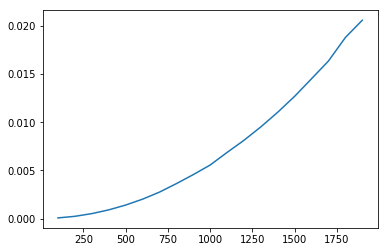

In [30]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

In [31]:
def findDisappearedNumbers2(nums):
    # For each number i in nums,
    # we mark the number that i points as negative.
    # Then we filter the list, get all the indexes
    # who points to a positive number
    for i in range(len(nums)):
        idx = abs(nums[i]) - 1
        nums[idx] = -abs(nums[idx])
    return [i+1 for i in range(len(nums)) if nums[i] > 0]

In [32]:
nums = [4,3,2,7,8,2,3,1]
print(findDisappearedNumbers2(nums))

[5, 6]


In [33]:
# O(n)
def findDisappearedNumbersTest2(nums):
    start = time.time()
    r = findDisappearedNumbers2(nums)
    t = time.time() - start
    return r, len(nums), t

random_lists = random_list(100)
rst = [findDisappearedNumbersTest2(l) for l in random_lists]
len(rst)
rst

[([], 100, 3.504753112792969e-05),
 ([], 200, 5.888938903808594e-05),
 ([], 300, 9.012222290039062e-05),
 ([], 400, 0.0003409385681152344),
 ([], 500, 0.00015878677368164062),
 ([], 600, 0.0001888275146484375),
 ([], 700, 0.0002319812774658203),
 ([], 800, 0.00026679039001464844),
 ([], 900, 0.0002868175506591797),
 ([], 1000, 0.00032210350036621094),
 ([], 1100, 0.0003631114959716797),
 ([], 1200, 0.0003871917724609375),
 ([], 1300, 0.0004279613494873047),
 ([], 1400, 0.00045680999755859375),
 ([], 1500, 0.0004889965057373047),
 ([], 1600, 0.0005257129669189453),
 ([], 1700, 0.0005600452423095703),
 ([], 1800, 0.0006830692291259766),
 ([], 1900, 0.0006110668182373047)]

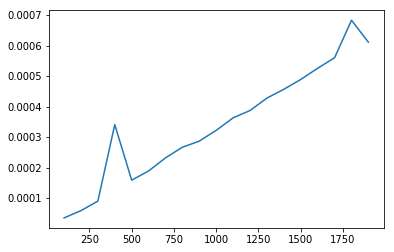

In [34]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

### Ex10：Plus One

Given a non-negative integer represented as a non-empty array of digits, plus one to the integer.

You may assume the integer do not contain any leading zero, except the number 0 itself.

The digits are stored such that the most significant digit is at the head of the list.

In [37]:
def plusOne(digits):
    if len(digits) == 0:
        return False
    addCarry=1
    for i in range(len(digits)-1, -1, -1):
        digits[i] += addCarry
        if digits[i] == 10:
            digits[i] = 0
            if i == 0:
                digits.insert(0, 1)
        else:
            break
    return digits

In [38]:
digits = [1, 2, 3]
print(plusOne(digits))
digits = [9, 9, 9]
print(plusOne(digits))

[1, 2, 4]
[1, 0, 0, 0]
